In [26]:
from PIL import Image
import numpy as np
from skimage import data, io, color
from sklearn.decomposition import PCA
from pylab import *
from matplotlib import pyplot as PLT
from sklearn.decomposition import PCA, IncrementalPCA
import pandas as pd
from sklearn.decomposition import TruncatedSVD


(3280, 4928)


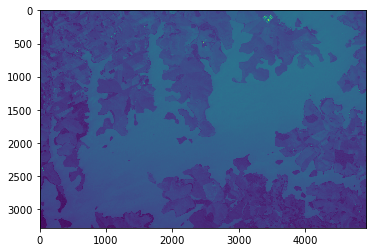

In [2]:
image = io.imread("/Users/billyxiao/cs542fall2017/TERC_project/WinEarthPhotosByKeyword/Day/iss052e014187.jpg"
                  ,as_grey=True)
print(image.shape)
PLT.imshow(image)
PLT.show()
#image = image.reshape(-1,3)


In [3]:

n_comp = 100
pca = PCA(n_components = n_comp,svd_solver='randomized')
pca.fit(image)
image_RGB_pca = pca.fit_transform(image)
image_RGB_restored = pca.inverse_transform(image_RGB_pca)



(3280, 4928)


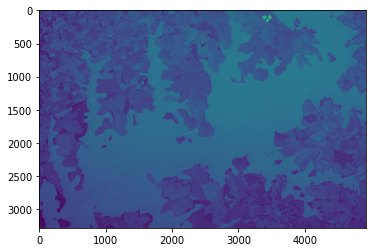

In [4]:
print(image_RGB_restored.shape)
image_restore = image_RGB_restored.reshape(3280, 4928)
PLT.imshow(image_restore)
PLT.show()

In [5]:
image_night = io.imread('/Users/billyxiao/cs542fall2017/TERC_project/WinEarthPhotosByKeyword/Night/iss050e041605.jpg'
                        ,as_grey=True)

a = image.reshape(1,-1)
b = image_night.reshape(1,-1)
datamat = np.concatenate((a,b),axis=0)

n_comp1 = 100
ipca = IncrementalPCA(n_components=n_comp1, batch_size=1000)
c = ipca.fit_transform(datamat)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/decomposition/incremental_pca.py:269: RuntimeWarning: Mean of empty slice.
  explained_variance[self.n_components_:].mean()
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [6]:
print(a[0])

[ 0.31298157  0.31298157  0.31298157 ...,  0.26367569  0.26367569
  0.26367569]


(2, 16163840)


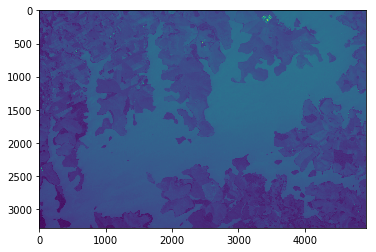

In [7]:
restored_2 = ipca.inverse_transform(c)
print(restored_2.shape)
image1 = restored_2[0].reshape(3280, 4928)
PLT.imshow(image1)
PLT.show()
image2 = restored_2[1].reshape(3280, 4928)

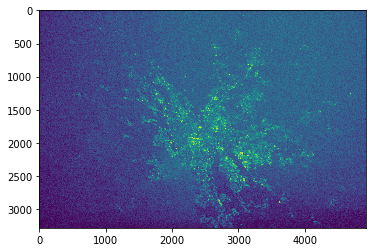

In [9]:
PLT.imshow(image2)
PLT.show()

In [3]:
image = io.imread("/Users/billyxiao/cs542fall2017/TERC_project/WinEarthPhotosByKeyword/Day/iss052e014187.jpg"
                  ,as_grey=True)
print(image.shape)


(3280, 4928)


In [4]:
img = Image.open("/Users/billyxiao/cs542fall2017/TERC_project/WinEarthPhotosByKeyword/Day/iss052e014187.jpg").convert('LA')
#wpercent = (basewidth / float(img.size[0]))
#hsize = int((float(img.size[1]) * float(wpercent)))
#img = img.resize((basewidth, hsize), PIL.Image.ANTIALIAS)

In [5]:
basewidth = 300
print(img.size)
wpercent = (basewidth / float(img.size[0]))
hsize = int((float(img.size[1]) * float(wpercent)))
img = img.resize((basewidth, hsize), Image.ANTIALIAS)
print(img.size)

(4928, 3280)
(300, 199)


In [6]:
img.show()

In [7]:
data = np.asarray(img)
data = data[:, :, 0]
#print(data.shape)
#print(data)
#PLT.imshow(data)
#PLT.show()
data = data.reshape(1,-1)
print(data[0])

[75 72 68 ..., 66 66 66]


In [116]:
from os import walk
import time
import glob
file_path = '/Users/billyxiao/cs542fall2017/TERC_project/ALLLLLLL'
#file_path2 = '/Users/billyxiao/cs542fall2017/TERC_project/Classified_new_data'
def mat_images(path):
    f = {}
    basewidth = 300
    for (dirpath, dirnames, filenames) in walk(path):
        print(dirnames)
        for i in dirnames:
            f[i]=(path+'/'+i)
        break
    print(f.values)
    
    mat = []
    keys = []
    dict_index = {}
    num_index = -1
    #shape = []
    #images = []
    count_same = 0
    for key,value in f.items():
        print(value)
        if key != '.ipynb_checkpoints' and key !='Movies3of36PhotosEach':
        #if key =='Day' or key == 'Night':
            for j in glob.glob(value+'/*.jpg'):
                #print(j)
                #count = 0
                #print(key)
                if j in dict_index:
                    index = dict_index[j]
                    #mat[index] = mat[index].append(key)
                    keys[index][key] = 1
                    count_same+=1
                else:
                    num_index+=1
                    dict_index[j] = num_index
                    keys.append({key:1})
                    #print(count)
                    #path = value+'/'+j
                    image_grey = Image.open(j).convert('LA')

                    wpercent = (basewidth / float(image_grey.size[0]))
                    #print(basewidth)
                    size = image_grey.size
                    #hsize = int((float(size[1]) * float(wpercent)))
                    if(size[0]>size[1]):
                        image_grey = image_grey.resize((300, 200), Image.ANTIALIAS)
                    else:
                        #hsize = int((float(size[0]) * float(wpercent)))
                        image_grey = image_grey.resize((200, 300), Image.ANTIALIAS)
                    #shape.append(image_grey.size)
                    #images.append(image_grey)
                    data = np.asarray(image_grey)

                    data = data[:, :, 0]

                    row = list(data.reshape(1,-1)[0])
                    #row.append(key)
                    #print(row)
                    mat.append(row)
    print(count_same)
    return mat, keys
                #if count >= 10:
                #    break
#print(shape)
#for i in images:
#    i.show()
#print(shape)
#print(type(mat))
#print(type(mat[0]))
#print(len(mat))
#print(len(mat[0]))
            

In [117]:
mat, keys= mat_images(file_path)
#mat2, keys2 = mat_images(file_path2)
#mat = mat+mat2
#keys = keys + keys2

['Agriculture', 'Aurora', 'Cupola', 'Day', 'DockUnlock', 'Moon', 'Night', 'Stars', 'Structure', 'SunriseSunset', 'Volcano']
<built-in method values of dict object at 0x265927318>
/Users/billyxiao/cs542fall2017/TERC_project/ALLLLLLL/Agriculture
/Users/billyxiao/cs542fall2017/TERC_project/ALLLLLLL/Aurora
/Users/billyxiao/cs542fall2017/TERC_project/ALLLLLLL/Cupola
/Users/billyxiao/cs542fall2017/TERC_project/ALLLLLLL/Day
/Users/billyxiao/cs542fall2017/TERC_project/ALLLLLLL/DockUnlock
/Users/billyxiao/cs542fall2017/TERC_project/ALLLLLLL/Moon
/Users/billyxiao/cs542fall2017/TERC_project/ALLLLLLL/Night
/Users/billyxiao/cs542fall2017/TERC_project/ALLLLLLL/Stars
/Users/billyxiao/cs542fall2017/TERC_project/ALLLLLLL/Structure
/Users/billyxiao/cs542fall2017/TERC_project/ALLLLLLL/SunriseSunset
/Users/billyxiao/cs542fall2017/TERC_project/ALLLLLLL/Volcano
0


In [120]:
#print(mat)
#keys = keys + keys2
#matnp = np.array(mat)
df = pd.DataFrame(mat)
df.to_csv('pixel_mat.csv')
#df_keys = pd.DataFrame.from_dict(keys)

In [121]:
df.shape

(11902, 60000)

In [125]:
df_keys = pd.DataFrame(keys)
df_keys = df_keys.fillna(0)
print(df_keys.shape)
print(df_keys)
#print(keys)
#print(matnp.shape)
#print(df_keys.shape)
#print(matnp[0])
#print(df)

(11902, 11)
       Agriculture  Aurora  Cupola  Day  DockUnlock  Moon  Night  Stars  \
0              1.0     0.0     0.0  0.0         0.0   0.0    0.0    0.0   
1              1.0     0.0     0.0  0.0         0.0   0.0    0.0    0.0   
2              1.0     0.0     0.0  0.0         0.0   0.0    0.0    0.0   
3              1.0     0.0     0.0  0.0         0.0   0.0    0.0    0.0   
4              1.0     0.0     0.0  0.0         0.0   0.0    0.0    0.0   
5              1.0     0.0     0.0  0.0         0.0   0.0    0.0    0.0   
6              1.0     0.0     0.0  0.0         0.0   0.0    0.0    0.0   
7              1.0     0.0     0.0  0.0         0.0   0.0    0.0    0.0   
8              1.0     0.0     0.0  0.0         0.0   0.0    0.0    0.0   
9              1.0     0.0     0.0  0.0         0.0   0.0    0.0    0.0   
10             1.0     0.0     0.0  0.0         0.0   0.0    0.0    0.0   
11             1.0     0.0     0.0  0.0         0.0   0.0    0.0    0.0   
12           

In [130]:
df_keys.to_csv('ykeys.csv')

In [143]:
df_keys = pd.read_csv('ykeys.csv')
df = pd.read_csv('pixel_mat.csv')

In [80]:
def lsa(dtm,num_components,algorithm):
    lsa = TruncatedSVD(num_components, algorithm = algorithm)
    column = []
    for i in range(num_components):
        column.append('component_'+str(i))
    dtm_lsa = lsa.fit_transform(dtm)
    dtm_lsa = Normalizer(copy=False).fit_transform(dtm_lsa)
    #df_result = pd.DataFrame(dtm_lsa, index = df.index, columns = column)
    #df_train_result = df_result[~df1_['Id'].isin(list_ids)]
    #df_test_result = df_result[df1_['Id'].isin(list_ids)]
    return dtm_lsa#df_train_result,df_test_result

In [126]:
n_comp1 = 200
ipca2 = IncrementalPCA(n_components=n_comp1, batch_size=1000)
yval_Aurora = df_keys['Aurora']
yval_Cupola = df_keys['Cupola']
yval_Day = df_keys['Day']
yval_DockUndock = df_keys['DockUnlock']
yval_Moon = df_keys['Moon']
yval_Night = df_keys['Night']
yval_Star = df_keys['Stars']
yval_Structure = df_keys['Structure']
yval_Sun = df_keys['SunriseSunset']
yval_Volcano = df_keys['Volcano']
yval_Agricul = df_keys['Agriculture']



Xval = ipca2.fit_transform(df)

In [127]:
Xval.shape

(11902, 200)

In [128]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [129]:
X_train, X_test, y_train, y_test = train_test_split(
    Xval, yval_Aurora, test_size=0.1, random_state=42)
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf = clf.fit(X_train, y_train)
print("Best estimator found by grid search:")
print(clf.best_estimator_)

Best estimator found by grid search:
SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [132]:
y_pred = clf.predict(X_test)
print("predict for aurora")
print(classification_report(y_test, y_pred))

predict for aurora
             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99      1165
        1.0       0.00      0.00      0.00        26

avg / total       0.96      0.98      0.97      1191



/Users/billyxiao/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [133]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(random_state=0)
clf_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [134]:
y_pred_rf = clf_rf.predict(X_test)
print("predict for aurora")
print(classification_report(y_test, y_pred_rf))

predict for aurora
             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99      1165
        1.0       1.00      0.04      0.07        26

avg / total       0.98      0.98      0.97      1191



In [137]:
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(
    Xval, df_keys, test_size=0.1, random_state=42)
param_grid_rf = {'bootstrap': [True,False],
              #'oob_score': [True,False],
              'n_jobs': [1,2,3,4], 
              'max_depth':[None,2,3,4,5],
              'n_estimators':[10,20,15]}
clf_rf = GridSearchCV(RandomForestClassifier(random_state=0), param_grid_rf)
clf_rf = clf_rf.fit(X_train_rf, y_train_rf)
print("Best estimator found by grid search:")
print(clf_rf.best_estimator_)
#clf_rf = RandomForestClassifier(random_state=0)
#clf_rf.fit(X_train_rf, y_train_rf)

Best estimator found by grid search:
RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=15, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)


In [139]:
y_pred_rf = clf_rf.predict(X_test_rf)
print("predict for multilabel")
print('0.Agriculture,1.aurora,2.Cupola,3.Day,4.DockUnlock,5.Moon,6.Night,7.Stars,8.Structure,9.SunriseSunset,10.Volcano')
print(classification_report(y_test_rf, y_pred_rf))

predict for multilabel
0.Agriculture,1.aurora,2.Cupola,3.Day,4.DockUnlock,5.Moon,6.Night,7.Stars,8.Structure,9.SunriseSunset,10.Volcano
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         2
          1       1.00      0.08      0.14        26
          2       0.60      0.54      0.57        39
          3       0.94      0.94      0.94       817
          4       1.00      0.37      0.54        43
          5       0.98      0.81      0.89        80
          6       0.82      0.32      0.46        57
          7       0.93      0.71      0.80        55
          8       0.00      0.00      0.00         7
          9       1.00      0.66      0.80        56
         10       0.00      0.00      0.00         9

avg / total       0.92      0.81      0.84      1191



In [140]:
from sklearn.neural_network import MLPClassifier
param_grid_mlp = {'activation': ['relu','logistic'],
              #'oob_score': [True,False],
              'alpha': [0.0001,0.001,0.1,0.00001], 
              'batch_size':[200,400,600],
              'learning_rate':['invscaling','constant','adaptive']}
clf_mlp = GridSearchCV(MLPClassifier(random_state=0), param_grid_mlp)
clf_mlp = clf_mlp.fit(X_train_rf, y_train_rf)
print("Best estimator found by grid search:")
print(clf_mlp.best_estimator_)
#clf_rf = RandomForestClassifier(random_state=0)
#clf_rf.fit(X_train_rf, y_train_rf)

Best estimator found by grid search:
MLPClassifier(activation='logistic', alpha=0.0001, batch_size=600, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='invscaling',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)


In [142]:
y_pred_mlp = clf_mlp.predict(X_test_rf)
print("predict for multilabel")
print('0.Agriculture,1.aurora,2.Cupola,3.Day,4.DockUnlock,5.Moon,6.Night,7.Stars,8.Structure,9.SunriseSunset,10.Volcano')
print(classification_report(y_test_rf, y_pred_mlp))

predict for multilabel
0.Agriculture,1.aurora,2.Cupola,3.Day,4.DockUnlock,5.Moon,6.Night,7.Stars,8.Structure,9.SunriseSunset,10.Volcano
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         2
          1       0.00      0.00      0.00        26
          2       0.85      0.56      0.68        39
          3       0.94      0.92      0.93       817
          4       0.95      0.44      0.60        43
          5       0.93      0.80      0.86        80
          6       0.55      0.11      0.18        57
          7       0.72      0.47      0.57        55
          8       0.00      0.00      0.00         7
          9       0.87      0.61      0.72        56
         10       0.00      0.00      0.00         9

avg / total       0.87      0.77      0.81      1191



/Users/billyxiao/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
